### Scaling graph plot 

- Authors : Angelica , Kshitij

In [58]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [59]:
def plot_scaling_analysis(results_dir,out='plot_scaling_analysis.png'):
    json_files = list(Path(results_dir).glob("*.json"))

    data = []
    for file in json_files:
        with open(file) as f:
            data.append(json.load(f))

    df = pd.DataFrame(data)
    df['total_time_min'] = df['total_time_sec'] / 60

    fig, ax = plt.subplots(figsize=(10, 6))

    for fraction in sorted(df['sample_fraction'].unique()):
        subset = df[df['sample_fraction'] == fraction].sort_values('num_executors', ascending=False)
        ax.plot(subset['num_executors'], subset['total_time_min'], 
                marker='o', linewidth=2, markersize=8, 
                label=f'Fraction: {fraction}')

    ax.set_xlabel('Number of Executors', fontsize=12)
    ax.set_ylabel('Total Time (minutes)', fontsize=12)
    ax.set_title('Vertical Scaling Performance Analysis\n(7GB Memory, 2 Cores per Executor)', 
                    fontsize=14, weight='bold')
    ax.legend(title='Data Fraction', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.invert_xaxis()
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    return df

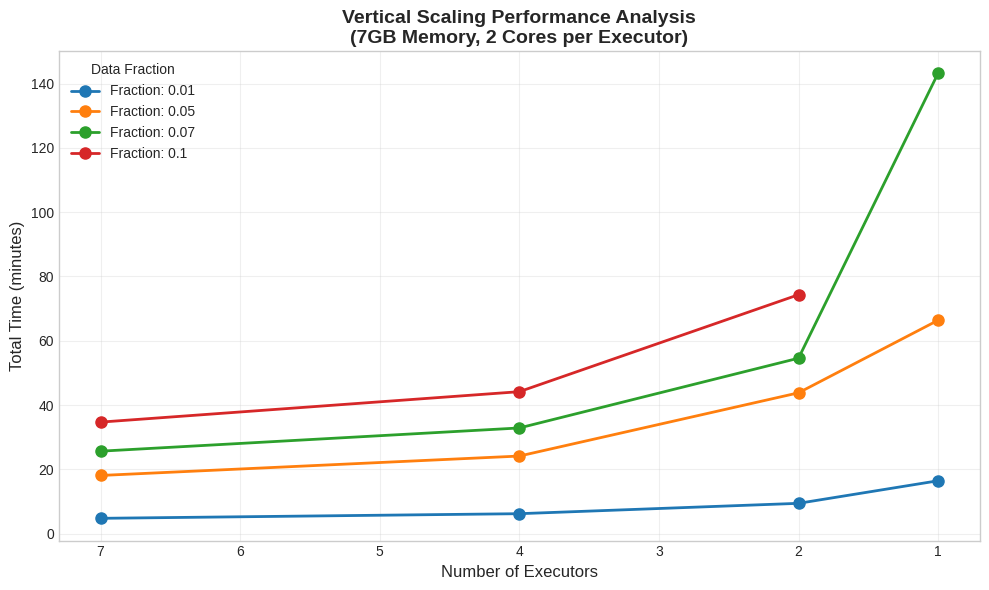

,train_count,val_count,test_count,num_partitions,val_accuracy,test_accuracy,training_time_sec,total_time_sec,num_executors,executor_cores,sample_fraction,executor_memory,spark_metrics,total_time_min
0,343594612,41677074,52920335,144,0.8013,0.7925,1024.69,1538.70,7,2,0.07,7,"{'numStages': 42, 'numTasks': 9763, 'elapsedTi...",25.645000
1,248515837,29591154,40674645,103,0.8056,0.7919,774.54,1085.46,7,2,0.05,7,"{'numStages': 42, 'numTasks': 6989, 'elapsedTi...",18.091000
2,491467368,61748129,70983222,206,0.7999,0.7875,1499.77,2081.10,7,2,0.10,7,"{'numStages': 42, 'numTasks': 13943, 'elapsedT...",34.685000
3,59109292,7015284,11836835,23,0.8090,0.7715,260.52,372.19,4,2,0.01,7,"{'numStages': 42, 'numTasks': 1497, 'elapsedTi...",6.203167
4,248515837,29591154,40674645,103,0.8056,0.7919,3657.28,3982.29,1,2,0.05,7,"{'numStages': 42, 'numTasks': 6985, 'elapsedTi...",66.371500
5,491467368,61748129,70983222,206,0.7999,0.7875,2052.03,2649.15,4,2,0.10,7,"{'numStages': 42, 'numTasks': 13943, 'elapsedT...",44.152500
6,343594612,41677074,52920335,144,0.8013,0.7925,2768.71,3274.02,2,2,0.07,7,"{'numStages': 42, 'numTasks': 9763, 'elapsedTi...",54.567000
7,59109292,7015284,11836835,23,0.8090,0.7715,184.44,285.72,7,2,0.01,7,"{'numStages': 42, 'numTasks': 1545, 'elapsedTi...",4.762000
8,343594612,41677074,52920335,144,0.8013,0.7925,1466.95,1972.11,4,2,0.07,7,"{'numStages': 42, 'numTasks': 9763, 'elapsedTi...",32.868500
9,343594612,41677074,52920335,144,0.8013,0.7925,6847.73,8592.49,1,2,0.07,7,"{'numStages': 42, 'numTasks': 9763, 'elapsedTi...",143.208167


In [60]:
results_dir_local = Path("../results/local/experiment-1-fixed-tree/")
plot_scaling_analysis(results_dir_local, out='graphs/scaling_analysis_local.png')